<a href="https://colab.research.google.com/github/CreativeStudies-NGT/DS_intro/blob/master/janken%E7%94%BB%E5%83%8F%E8%AA%8D%E8%AD%98model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/karaage0703/janken_dataset datasets
!rm -rf /content/datasets/.git
!rm /content/datasets/LICENSE

Cloning into 'datasets'...
remote: Enumerating objects: 210, done.
remote: Total 210 (delta 0), reused 0 (delta 0), pack-reused 210
Receiving objects: 100% (210/210), 4.60 MiB | 10.46 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [0]:
!ls datasets

choki  gu  pa


In [0]:
!ls datasets/choki

choki_01.jpg  IMG_0783.JPG  IMG_0797.JPG  IMG_0811.JPG	IMG_0876.JPG
IMG_0770.JPG  IMG_0784.JPG  IMG_0798.JPG  IMG_0812.JPG	IMG_0877.JPG
IMG_0771.JPG  IMG_0785.JPG  IMG_0799.JPG  IMG_0813.JPG	IMG_0878.JPG
IMG_0772.JPG  IMG_0786.JPG  IMG_0800.JPG  IMG_0814.JPG	IMG_0879.JPG
IMG_0773.JPG  IMG_0787.JPG  IMG_0801.JPG  IMG_0815.JPG	IMG_0880.JPG
IMG_0774.JPG  IMG_0788.JPG  IMG_0802.JPG  IMG_0816.JPG	IMG_0881.JPG
IMG_0775.JPG  IMG_0789.JPG  IMG_0803.JPG  IMG_0817.JPG	IMG_0882.JPG
IMG_0776.JPG  IMG_0790.JPG  IMG_0804.JPG  IMG_0818.JPG	IMG_0883.JPG
IMG_0777.JPG  IMG_0791.JPG  IMG_0805.JPG  IMG_0870.JPG	IMG_0884.JPG
IMG_0778.JPG  IMG_0792.JPG  IMG_0806.JPG  IMG_0871.JPG	IMG_0885.JPG
IMG_0779.JPG  IMG_0793.JPG  IMG_0807.JPG  IMG_0872.JPG
IMG_0780.JPG  IMG_0794.JPG  IMG_0808.JPG  IMG_0873.JPG
IMG_0781.JPG  IMG_0795.JPG  IMG_0809.JPG  IMG_0874.JPG
IMG_0782.JPG  IMG_0796.JPG  IMG_0810.JPG  IMG_0875.JPG


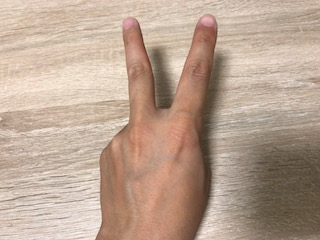

In [0]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('datasets/choki/choki_01.jpg'))

In [0]:
import sys
import os
import shutil
backup_dir = './model'
dataset_root_dir = '/content/datasets'

labels = [d for d in os.listdir(dataset_root_dir) if os.path.isdir(os.path.join(dataset_root_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
    shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
    for label in labels:
        f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

class number=3


In [0]:
!cat ./model/labels.txt

choki
gu
pa


In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.python.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import time

In [0]:
labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

['choki', 'gu', 'pa']


In [0]:
# 学習率
LEARNING_RATE = 0.001
# エポック（世代数）
EPOCHS = 20
# バッチサイズ
BATCH_SIZE = 32

In [0]:
IMAGE_SIZE = 64

train_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.33)

train_data = train_data_gen.flow_from_directory(dataset_root_dir,
                                                subset='training',
                                                target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                color_mode='rgb',
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                shuffle=True)

validation_data = train_data_gen.flow_from_directory(dataset_root_dir,
                                                     subset='validation',
                                                     target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                     color_mode='rgb',
                                                     batch_size=BATCH_SIZE,
                                                     class_mode='categorical',
                                                     shuffle=True)

Found 114 images belonging to 3 classes.
Found 53 images belonging to 3 classes.


In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(lr=LEARNING_RATE), loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 61504)             0

In [0]:
# モデルの保存
model_json_str = model.to_json()
with open(backup_dir + '/mnist_deep_model.json', 'w') as f:
    f.write(model_json_str)

# 重みデータのバックアップ
cb_cp = tf.keras.callbacks.ModelCheckpoint(backup_dir + '/weights.{epoch:02d}.hdf5', verbose=1, save_weights_only=True)
# TensorBoard用のデータ
cb_tf = tf.keras.callbacks.TensorBoard(log_dir=backup_dir + '/tensorBoard', histogram_freq=0)

start = time.time()

steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = max(validation_data.n // validation_data.batch_size, 1)

history = model.fit_generator(train_data, steps_per_epoch=steps_per_epoch, epochs=EPOCHS,
                   validation_data=validation_data, validation_steps=validation_steps, verbose=1,  callbacks=[cb_cp, cb_tf])

elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

Epoch 1/20
1/3 [=========>....................] - ETA: 0s - loss: 1.3840 - acc: 0.3125
Epoch 00001: saving model to ./model/weights.01.hdf5
3/3 [==============================] - 4s 1s/step - loss: 2.9467 - acc: 0.3958 - val_loss: 1.3840 - val_acc: 0.3125
Epoch 2/20
1/3 [=========>....................] - ETA: 0s - loss: 1.1504 - acc: 0.3125
Epoch 00002: saving model to ./model/weights.02.hdf5
3/3 [==============================] - 2s 631ms/step - loss: 1.3437 - acc: 0.3529 - val_loss: 1.1504 - val_acc: 0.3125
Epoch 3/20
1/3 [=========>....................] - ETA: 0s - loss: 1.0823 - acc: 0.3750
Epoch 00003: saving model to ./model/weights.03.hdf5
3/3 [==============================] - 2s 771ms/step - loss: 1.1550 - acc: 0.4167 - val_loss: 1.0823 - val_acc: 0.3750
Epoch 4/20
1/3 [=========>....................] - ETA: 0s - loss: 1.0662 - acc: 0.3750
Epoch 00004: saving model to ./model/weights.04.hdf5
3/3 [==============================] - 2s 696ms/step - loss: 1.0586 - acc: 0.5244 - va

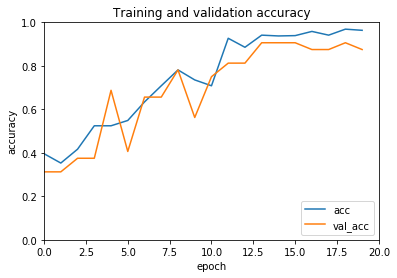

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim([0.0, EPOCHS])
plt.ylim([0.0, 1.0])
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

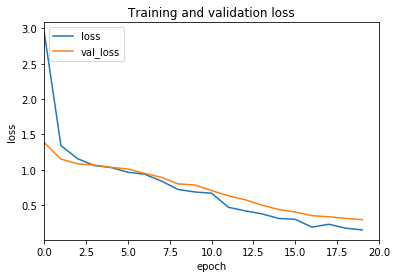

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlim([0.0, EPOCHS])
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

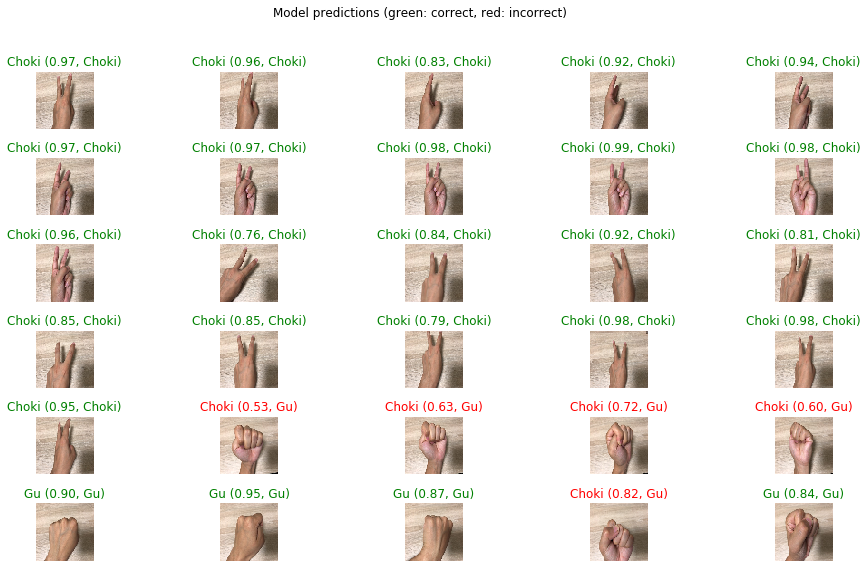

In [0]:
# Get the ordered list of class names:
import PIL.Image as Image
class_names = validation_data.class_indices.items()
class_names = np.array([key.title() for key, value in class_names])

validation_data.reset()
validation_data.shuffle = False
validation_data.batch_size = BATCH_SIZE

# Retrieve the first batch from the validation data
for validation_image_batch, validation_label_batch in validation_data:
  break

validation_id = np.argmax(validation_label_batch, axis=-1)
validation_label = class_names[validation_id]
predicted_batch = model.predict(validation_image_batch)

# Returns the indices of the maximum values along a given axis
predicted_id = np.argmax(predicted_batch, axis=-1)

# Return the maximum values along a given axis
predicted_score = np.max(predicted_batch, axis=-1)

predicted_label_batch = class_names[predicted_id]

plt.figure(figsize=(16, 9))
plt.subplots_adjust(hspace=0.5)

# Display the classification results for the first 30 images
for n in range(min(validation_image_batch.shape[0], 30)):
  plt.subplot(6, 5, n + 1)

  # Convert the range from -1 to 1 to the range from 0 to 1
  plt.imshow(np.array(validation_image_batch[n]*255,np.int32))
  color = 'green' if predicted_id[n] == validation_id[n] else 'red'
  predicted_label = predicted_label_batch[n].title()
  plt.title(predicted_label + ' ({:.2f}, {})'.format(
      predicted_score[n], validation_label[n]), color=color)
  plt.axis('off')

_ = plt.suptitle('Model predictions (green: correct, red: incorrect)')

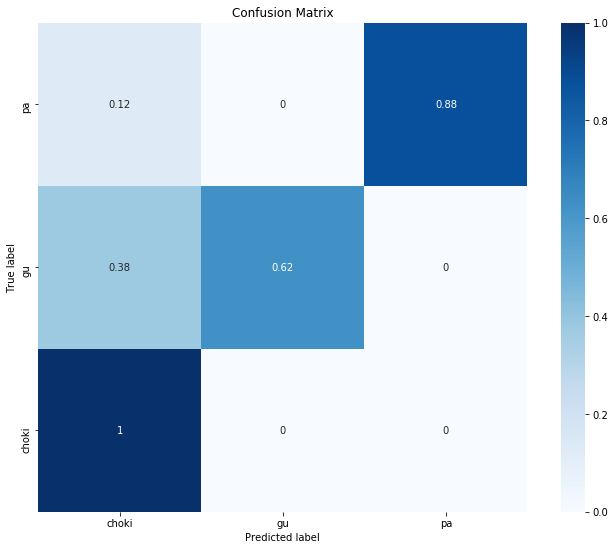

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

validation_data.reset()
validation_data.shuffle =  False
validation_data.batch_size = 1

predicted = model.predict_generator(validation_data, steps=validation_data.n)
predicted_classes = np.argmax(predicted, axis=-1)

# Apply normalization
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
cm = confusion_matrix(validation_data.classes, predicted_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 9))

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://matplotlib.org/users/colormaps.html
sns.heatmap(cm, annot=True, square=True, cmap=plt.cm.Blues,
            xticklabels=validation_data.class_indices,
            yticklabels=validation_data.class_indices)

plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xlim([0.0, 3.0])
plt.ylim([0.0, 3.0])
plt.show()

In [0]:
!tar cvzf model.tar.gz ./model/weights.20.hdf5 ./model/labels.txt ./model/mnist_deep_model.json

./model/weights.20.hdf5
./model/labels.txt
./model/mnist_deep_model.json


In [0]:
from google.colab import files
files.download("model.tar.gz")